In [1]:
import os
import pickle
import torch
import numpy as np
from math import ceil
from model_vc import Generator
import librosa
import librosa.display
import matplotlib.pyplot as plt


metadata = pickle.load(open('/home/ytang363/7100_voiceConversion/autovc-master/metadata.pkl', "rb"))
train = pickle.load(open('/home/ytang363/7100_voiceConversion/VCTK-Corpus-0.92/spmel-test/train.pkl', "rb"))

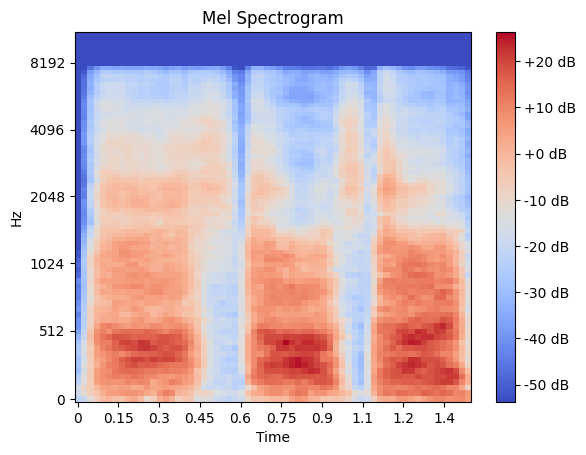

In [4]:
audio_path = '/home/ytang363/7100_voiceConversion/p225xp225.wav'
y, sr = librosa.load(audio_path)
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

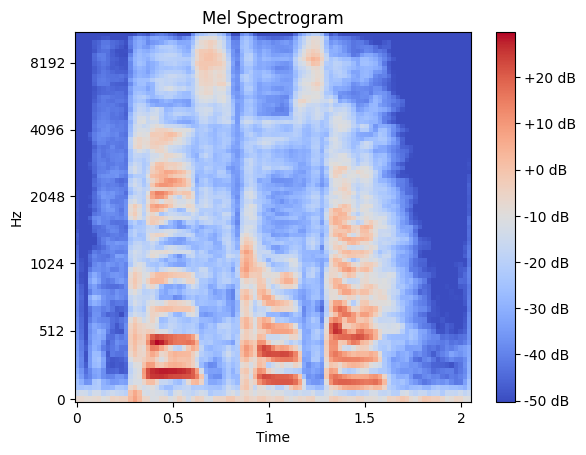

In [5]:
audio_path = '/home/ytang363/7100_voiceConversion/VCTK-Corpus-0.92/wav/p225/p225_001_mic1.wav'
y, sr = librosa.load(audio_path)
mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=80)
mel_spectrogram_db = librosa.power_to_db(mel_spectrogram)
librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()

In [25]:
# for sbmt_i in metadata:
#     print(sbmt_i[2].shape)
metadata[0]

['p225',
 array([-2.92885415e-02,  1.67739280e-02,  6.42375797e-02,  5.12384847e-02,
         8.77934247e-02, -4.05867286e-02,  1.08849108e-02,  2.06673276e-02,
        -8.39690343e-02,  1.48199843e-02,  3.82344425e-02,  1.12243919e-02,
         4.62971367e-02,  1.66661311e-02, -5.78785129e-02,  3.60288732e-02,
         1.92339886e-02,  9.17971320e-03,  2.74707917e-02, -5.48039749e-02,
         2.50798557e-02,  4.66737375e-02, -6.14981353e-03,  3.88026945e-02,
         5.68139665e-02, -7.33052716e-02,  2.30920967e-02, -1.04292825e-01,
        -2.61898227e-02,  3.02257240e-02, -3.02889403e-02,  3.63447554e-02,
        -4.97230627e-02,  1.57715172e-01, -3.93295921e-02,  5.51161245e-02,
         4.64604087e-02, -4.59927395e-02, -4.82378080e-02, -3.81431282e-02,
         3.91379185e-02,  4.59317304e-02, -1.55072343e-02, -1.67513415e-02,
        -5.09507731e-02, -5.08496165e-02, -2.25679334e-02,  2.63878461e-02,
        -1.26611767e-02, -2.49883570e-02,  3.02621610e-02, -2.48487398e-04,
   

In [15]:
# for sbmt_i in train:
#     print(sbmt_i)
train[0]

['p225',
 array([ 0.03292301, -0.02366718, -0.03238035,  0.00259492, -0.01899617,
         0.04801541, -0.03478891,  0.02232468, -0.07545512, -0.01349727,
         0.03411194, -0.00756761,  0.01898984,  0.03053368,  0.00617956,
        -0.02711098, -0.03813331,  0.08029403,  0.00473696, -0.00624924,
         0.01337628, -0.01386942,  0.00324195,  0.03734235, -0.010461  ,
         0.05799512,  0.03529891, -0.04751366,  0.03659704, -0.01271462,
         0.01901273,  0.01433611, -0.02194966, -0.03262233,  0.05967575,
        -0.04415211, -0.03679935, -0.01338128,  0.0452877 ,  0.02108612,
         0.04091473, -0.00938777,  0.0440091 ,  0.00234867, -0.02174397,
        -0.00272011, -0.03025996,  0.08198869, -0.06662133,  0.00918514,
        -0.0478525 ,  0.0228488 , -0.03590626,  0.00011399, -0.0513776 ,
         0.02418199, -0.07684427, -0.0383307 , -0.00652619,  0.01987358,
         0.00097847, -0.01339104, -0.01608601, -0.04107529,  0.01851036,
         0.00124294,  0.00805433, -0.00110